Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8639 - loss: 0.4840 - val_accuracy: 0.9537 - val_loss: 0.1612
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9589 - loss: 0.1375 - val_accuracy: 0.9638 - val_loss: 0.1207
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9746 - loss: 0.0887 - val_accuracy: 0.9711 - val_loss: 0.0966
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9797 - loss: 0.0641 - val_accuracy: 0.9713 - val_loss: 0.0934
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9867 - loss: 0.0458 - val_accuracy: 0.9732 - val_loss: 0.0904
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


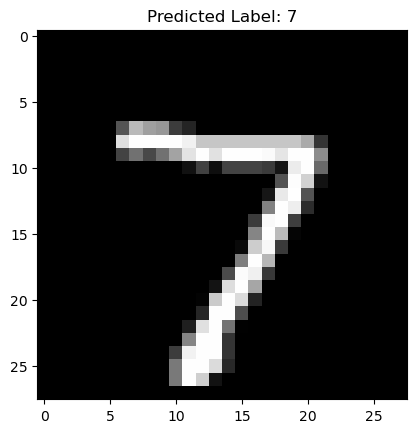

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9723 - loss: 0.0886
Test accuracy: 0.9757000207901001


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

first_image = X_test[0].reshape((1, 28, 28))
predicted_probs = model.predict(first_image)
predicted_class = tf.argmax(predicted_probs, axis=1).numpy()[0]

plt.imshow(first_image.squeeze(), cmap='gray')
plt.title(f"Predicted Label: {predicted_class}")
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)